In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

from constants import numeric_columns as num_cols


train_df = pd.read_csv("C:\\Users\\Gagia\\Desktop\\progetto DM\\code\\train.csv")
test_df = pd.read_csv('C:\\Users\\Gagia\\Desktop\\progetto DM\\code\\test.csv')

In [141]:
for col in num_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
# train_df[num_cols] = pd.to_numeric(train_df[num_cols], errors='coerce')

train_df.loc[train_df['genres'] == r'\N', 'genres'] = np.nan
train_df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,NaN,NaN,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,NaN,NaN,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,NaN,NaN,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,NaN,NaN,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020.0,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,"(5, 6]",1942,NaN,NaN,0.0,73,1,10,4,...,movie,0,False,True,0,14,4,73,['FR'],Comedy
16427,Haar Jeet,"(4, 5]",1990,NaN,NaN,0.0,15,1,10,2,...,movie,0,False,True,0,1,1,15,['IN'],"Action,Drama,Thriller"
16428,Kotigobba 3,"(5, 6]",2021,NaN,140.0,0.0,2560,1,10,39,...,movie,5,False,True,0,5,49,2560,['IN'],"Action,Drama,Romance"
16429,Ator l'invincibile,"(3, 4]",1982,NaN,NaN,0.0,3011,1,10,52,...,movie,0,False,True,0,26,58,3012,['IT'],"Action,Adventure,Fantasy"


In [142]:
train_df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,NaN,NaN,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,NaN,NaN,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,NaN,NaN,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,NaN,NaN,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020.0,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


# FIG.1(b)
### counting of ratings frequencies

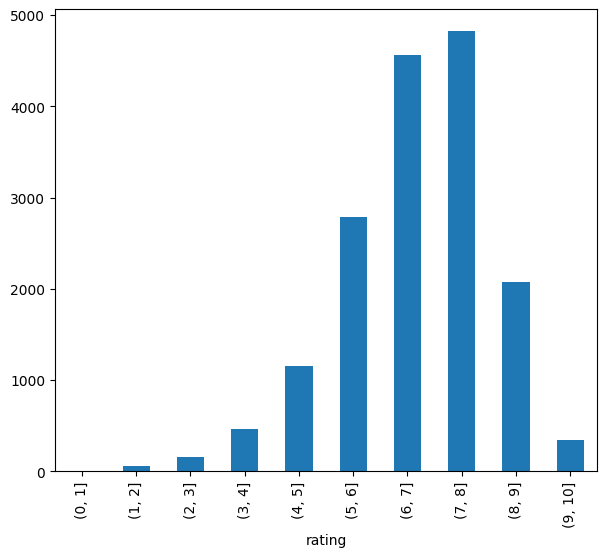

In [143]:
plt.figure(figsize = (7, 6))


grouped_ratings = train_df.groupby('rating').count()
grouped_ratings['originalTitle'].plot(kind= 'bar')

plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\fig1_b.png')

# FIG.1(a)
### counting of the title types frequencies combined with the canHaveEpisodes variable

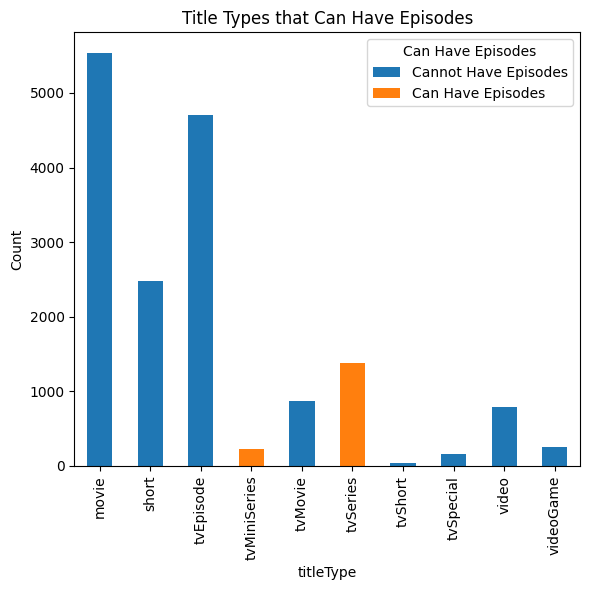

In [144]:
#qunidi plottare canHaveEpisodes e titletype insieme
train_df["titleType"].unique()
counts = train_df.groupby(['titleType', 'canHaveEpisodes']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True,  figsize=(6, 6))
plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\fig1_a.png')

plt.xlabel('titleType')
plt.ylabel('Count')
plt.title('Title Types that Can Have Episodes')
plt.legend(['Cannot Have Episodes', 'Can Have Episodes'], title='Can Have Episodes')
plt.tight_layout()
plt.show()



In [145]:
counts

canHaveEpisodes,False,True
titleType,,
movie,5535,0
short,2474,0
tvEpisode,4698,0
tvMiniSeries,0,224
tvMovie,868,0
tvSeries,0,1375
tvShort,40,0
tvSpecial,166,0
video,792,0


# FIG.1(c)
### counting of the adult and non-adult frequencies combined with the isRatable attribute

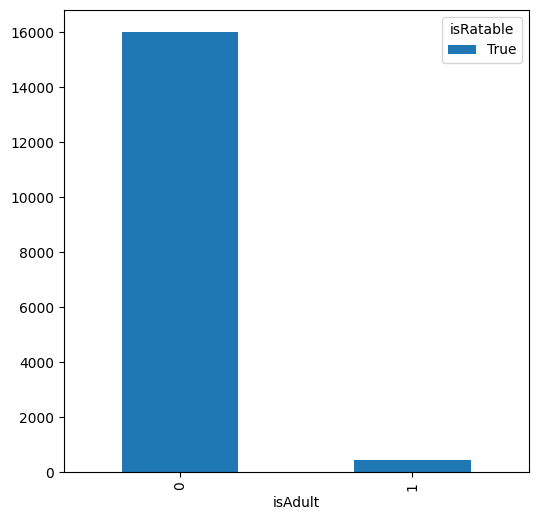

In [146]:
grouped_adult = train_df.groupby('isAdult').count()

x = train_df.groupby(['isAdult', 'isRatable']).size().unstack(fill_value=0)
x.plot(kind='bar', stacked=True,  figsize=(6, 6))
plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\fig1_c.png')

In [147]:
grouped_adult

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
isAdult,,,,,,,,,,,,,,,,,,,,,
0,16005,16005,16005,808,11286,13461,16005,16005,16005,16005,...,16005,16005,16005,16005,16005,16005,16005,16005,16005,15634
1,426,426,426,6,293,352,426,426,426,426,...,426,426,426,426,426,426,426,426,426,415


# FIG.1(d)
### plot generi più frequenti

In [148]:
#trasformiamo paesi in liste di stringhe 
train_df['countryOfOrigin'] = train_df['countryOfOrigin'].apply(ast.literal_eval)

for v in train_df["countryOfOrigin"]:
    x = type(v)
x


list

In [149]:
# converts into series of arrays of strings
train_df['genres'] = train_df['genres'].apply(
    lambda x: x.split(',') if isinstance(x, str) else np.nan
)


In [150]:
train_df['genres']

0        [Action, Adventure, Animation]
1                              [Action]
2                              [Comedy]
3                          [Reality-TV]
4              [Comedy, Drama, Romance]
                      ...              
16426                          [Comedy]
16427         [Action, Drama, Thriller]
16428          [Action, Drama, Romance]
16429      [Action, Adventure, Fantasy]
16430                    [Drama, Short]
Name: genres, Length: 16431, dtype: object

In [ ]:
import itertools

set(itertools.chain.from_iterable(train_df.loc[~train_df['genres'].isna(), 'genres']))

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

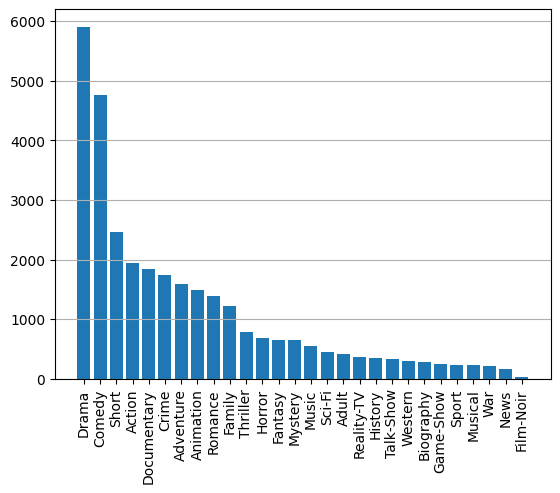

In [152]:
from collections import Counter

# for genre in itertools.chain.from_iterable(train_df.loc[~train_df['genres'].isna(), 'genres']):
genre_counts = Counter(itertools.chain.from_iterable(train_df.loc[~train_df['genres'].isna(), 'genres']))

genre_counts_df = pd.DataFrame(
        genre_counts.items(),
        columns=['Genre', 'Count']
    ).sort_values(by='Count', ascending= False)

plt.bar(x= genre_counts_df['Genre'], height= genre_counts_df['Count'],)
plt.xticks(rotation= 90)
plt.grid(axis= 'y')
# plt.yscale('log')

In [153]:
#le unique countries sono 153 quindi forse difficile plottare per paesi
#in report a questo punto meglio mettere plot generi
import itertools

unique_countries = set(itertools.chain.from_iterable(train_df.loc[~train_df['countryOfOrigin'].isna(), 'countryOfOrigin']))
unique_countries

{'AD',
 'AE',
 'AF',
 'AL',
 'AM',
 'AO',
 'AR',
 'AT',
 'AU',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BO',
 'BR',
 'BY',
 'CA',
 'CD',
 'CH',
 'CL',
 'CM',
 'CN',
 'CO',
 'CR',
 'CSHH',
 'CSXX',
 'CU',
 'CY',
 'CZ',
 'DDDE',
 'DE',
 'DK',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'EH',
 'ES',
 'ET',
 'FI',
 'FR',
 'GA',
 'GB',
 'GD',
 'GE',
 'GL',
 'GM',
 'GN',
 'GP',
 'GR',
 'GT',
 'GW',
 'GY',
 'HK',
 'HR',
 'HT',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JM',
 'JO',
 'JP',
 'KE',
 'KG',
 'KH',
 'KP',
 'KR',
 'KW',
 'KY',
 'KZ',
 'LB',
 'LC',
 'LI',
 'LK',
 'LS',
 'LT',
 'LU',
 'LV',
 'LY',
 'MA',
 'MC',
 'ME',
 'MK',
 'ML',
 'MM',
 'MO',
 'MQ',
 'MT',
 'MX',
 'MY',
 'NA',
 'NE',
 'NG',
 'NL',
 'NO',
 'NP',
 'NZ',
 'PE',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'PY',
 'QA',
 'RO',
 'RS',
 'RU',
 'RW',
 'SA',
 'SE',
 'SG',
 'SI',
 'SK',
 'SM',
 'SN',
 'SR',
 'SUHH',
 'SV',
 'SY',
 'TG',
 'TH',
 'TN',
 'TO',
 'TR',
 'TT',
 'TW',
 'UA',
 'US',
 'UY',
 'UZ'

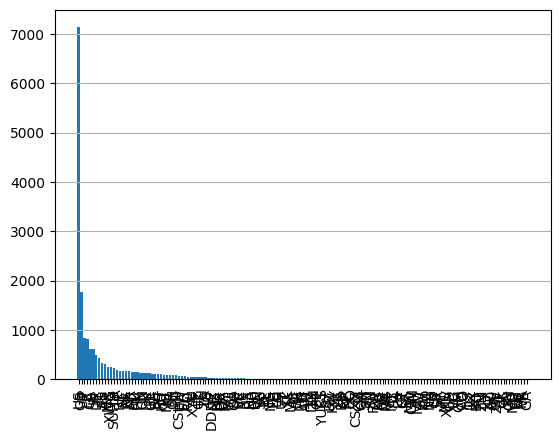

In [154]:
from collections import Counter

# for genre in itertools.chain.from_iterable(train_df.loc[~train_df['genres'].isna(), 'genres']):
countries_counts = Counter(itertools.chain.from_iterable(train_df.loc[~train_df['countryOfOrigin'].isna(), 'countryOfOrigin']))

countries_counts_df = pd.DataFrame(
        countries_counts.items(),
        columns=['Country', 'Count']
    ).sort_values(by='Count', ascending= False)

plt.bar(x= countries_counts_df['Country'], height= countries_counts_df['Count'],)
plt.xticks(rotation= 90)
plt.grid(axis= 'y')
# plt.yscale('log')